In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Load pre-processed data
FecalMG_BA = pd.read_csv("FecalMG_BA.csv", index_col=0, delimiter=",")
FecalMG_BA = FecalMG_BA.T
FecalMG_BA.index.name = 'patient_id'

# Define a list of invalid names: no information or virus are invalid
invalid_names = ['f__; g__; s__','g__; s__','Afipia','Abiotrophia','Acidovorax','Acinetobacter','Aeromicrobium','Aquabacterium','Arthrobacter','Asticcacaulis','Aurantimonas','Azoarcus','Azospira','Bacillus','Beijerinckia','Beutenbergia','Bosea','Bradyrhizobium','Brevibacillus','Brevundimonas','Brochothrix','Burkholderia','Caulobacter','Chryseobacterium','Corynebacterium','Craurococcus','Curtobacterium','Deinococcus','Devosia','Dietzia','Dyadobacter','Enhydrobacter','Enterobacter','Escherichia','Facklamia','Flavobacterium','Geodermatophilus','Hoeflea','Hydrotalea','Janibacter','Kingella','Kocuria','Leptothrix','Limnobacter','Massilia','Mesorhizobium','Methylobacterium','Methylophilus','Methyloversatilis','Microbacterium','Micrococcus','Microlunatus','Nevskia','Niastella','Novosphingobium','Ochrobactrum','Olivibacter','Oxalobacter','Paenibacillus','Paracoccus','Patulibacter','Pedobacter','Pedomicrobium','Pelomonas','Phyllobacterium','Polaromonas','Propionibacterium','Pseudomonas','Pseudoxanthomonas','Psychrobacter','Ralstonia','Rhizobium','Rhodococcus','Roseomonas','Schlegelella','Sphingobium','Sphingomonas','Sphingopyxis','Stenotrophomonas','Streptococcus','Sulfuritalea','Tsukamurella','Undibacterium','Variovorax','Wautersiella','Xanthomonas']

for col in FecalMG_BA.columns:
    if any(invalid_name in col for invalid_name in invalid_names):
        FecalMG_BA.drop(col, axis=1, inplace=True)

FecalMG_BA.index = FecalMG_BA.index.astype(str)
FecalMG_BA

Patient_id,Pisciglobus,Pleomorphomonas,Ensifer,Parvimonas,Gibbsiella,Oscillibacter,Gracilibacter,Desulfobacterium,Dissulfuribacter,Thiomicrospira,...,Desertibacter,Paraglaciecola,Gangjinia,Anaplasma,Klebsiellaquasipneumoniae,Psychrobium,Anoxybacter,Alkalibaculum,Natronoflexus,Methanosphaera
patient_id,,,,,,,,,,,,,,,,,,,,,
10023,0.0,0.0,0.0,3.400000,1.811111,28.666667,0.000000,0.0,0.0,0.4,...,0.0,0.2,0.0,0.0,0.000000,0.000000,0.000000,0.500000,0.666667,0.0
10025,0.0,0.0,0.0,10.666667,0.000000,226.666667,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1.116667,0.000000,0.200000,0.0
10029,0.0,0.0,0.0,0.000000,1.300000,1716.704762,0.285714,0.0,0.0,0.4,...,0.0,0.2,0.0,0.0,6.400000,0.000000,0.000000,0.000000,0.000000,0.0
10031,0.0,0.0,0.0,2.200000,11.305556,68.000000,0.791667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.966667,0.000000,0.000000,0.000000,0.000000,0.0
10036,0.0,0.0,0.0,2.400000,0.000000,85.238095,0.250000,0.0,0.0,0.4,...,0.0,0.2,0.0,0.0,0.000000,0.666667,0.000000,1.083333,6.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10097.1,0.0,0.0,0.0,30.000000,8.511111,320.300000,1.488889,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,37.900000,0.000000,0.000000,0.000000,5.333333,0.0
10099.1,0.0,0.0,0.0,0.000000,0.683333,107.700000,0.200000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.100000,0.000000,0.000000,0.000000,1.333333,0.0
10199.1,0.0,0.0,0.0,0.666667,2.133333,424.900000,0.400000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.200000,0.000000,0.000000,1.000000,0.366667,0.0


In [37]:
metadata = pd.read_csv("Metadata_FecalMG.csv", index_col=0,delimiter=",")
#metadata = metadata.dropna()
metadata.index.name = 'patient_id'
metadata.index = metadata.index.astype(str)
metadata

,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location
patient_id,,,,,,,,
10021,Stage_I_II,I,57,M,26.8809517,130,993,Left colon
10023,Healthy,-,65,M,26.5625,660,0,-
10025,Healthy,-,40,M,25,400,993,-
10029,Healthy,-,67,F,20.17325264,0,0,-
10031,Healthy,-,77,M,24.4646016,300,813,-
...,...,...,...,...,...,...,...,...
12276,Healthy,-,46,M,21.79944511,0,430,-
12340,Healthy,-,59,M,26.53375883,0,989.9,-
12370,Healthy,-,65,F,18.25631871,0,0,-


In [38]:
metadata.columns

Index(['Group', 'Stage', 'Age', 'Gender', 'BMI', 'Brinkman Index', 'Alcohol',
       'Tumor location'],
      dtype='object')

In [39]:
class_counts = metadata['Group'].value_counts()
print(class_counts)

Group
Healthy         251
Stage_I_II      111
Stage_III_IV     74
Stage_0          73
MP               67
HS               40
Name: count, dtype: int64


In [40]:
FecalMG_BA_Final = pd.merge(FecalMG_BA, metadata, on='patient_id', how='inner')
stage_mapping = {
    'Stage_0': 'CRC',
    'Stage_I_II': 'CRC',
    'Stage_III_IV': 'CRC',
    'MP': 'CRC',
    'HS': 'CRC',
}

FecalMG_BA_Final['Group'] = FecalMG_BA_Final['Group'].replace(stage_mapping)
FecalMG_BA_Final
#FecalMG_BA_Final.to_csv('SingaporeCRC_data/FecalMG_BA_Final', index=False)

,Pisciglobus,Pleomorphomonas,Ensifer,Parvimonas,Gibbsiella,Oscillibacter,Gracilibacter,Desulfobacterium,Dissulfuribacter,Thiomicrospira,...,Natronoflexus,Methanosphaera,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location
patient_id,,,,,,,,,,,,,,,,,,,,,
10023,0.0,0.0,0.0,3.400000,1.811111,28.666667,0.000000,0.0,0.0,0.4,...,0.666667,0.0,Healthy,-,65,M,26.5625,660,0,-
10025,0.0,0.0,0.0,10.666667,0.000000,226.666667,0.000000,0.0,0.0,0.0,...,0.200000,0.0,Healthy,-,40,M,25,400,993,-
10029,0.0,0.0,0.0,0.000000,1.300000,1716.704762,0.285714,0.0,0.0,0.4,...,0.000000,0.0,Healthy,-,67,F,20.17325264,0,0,-
10031,0.0,0.0,0.0,2.200000,11.305556,68.000000,0.791667,0.0,0.0,0.0,...,0.000000,0.0,Healthy,-,77,M,24.4646016,300,813,-
10036,0.0,0.0,0.0,2.400000,0.000000,85.238095,0.250000,0.0,0.0,0.4,...,6.000000,0.0,Healthy,-,64,F,21.1552942,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10806,0.0,0.0,0.0,2.000000,0.000000,133.916667,0.000000,0.0,0.0,0.0,...,1.066667,0.0,CRC,-,51,F,18.08021039,90,669.9,-
11074,0.0,0.0,0.0,0.000000,0.400000,363.666667,0.000000,0.0,0.0,0.0,...,1.333333,0.0,CRC,Normal,42,F,17.94181725,110,120,-
11336,0.2,0.0,0.0,14.000000,16.200000,0.666667,0.000000,0.0,0.0,0.0,...,0.000000,0.0,CRC,-,70,F,20.504934,0,18.26,-


In [41]:
class_counts = FecalMG_BA_Final['Group'].value_counts()
print(class_counts)

Group
CRC        365
Healthy    251
Name: count, dtype: int64


In [42]:
# Prepare features and target variable
X = FecalMG_BA_Final.drop(['Group', 'Stage', 'Age', 'Gender', 'BMI', 'Brinkman Index', 'Alcohol',
       'Tumor location'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
y = FecalMG_BA_Final['Group']
print("Unique values of y:", np.unique(y))
le = LabelEncoder()
y = le.fit_transform(y)
y
print("Unique values of y:", np.unique(y))
print("Shape of y:", X_scaled.shape)
print("Shape of y:", y.shape)

Unique values of y: ['CRC' 'Healthy']
Unique values of y: [0 1]
Shape of y: (616, 1861)
Shape of y: (616,)


In [43]:
# Oversampling to ensure class balance
from imblearn.over_sampling import SMOTE
#oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
#X_scaled, y = oversampler.fit_resample(X_scaled,y)

sm = SMOTE(sampling_strategy='not majority', k_neighbors= 5, random_state=42)
X_scaled, y = sm.fit_resample(X_scaled, y)

print(X_scaled.shape)
print(y.shape)

(730, 1861)
(730,)


Best Parameters: {'max_features': 0.1, 'n_estimators': 500}
Best Score: 0.7226348364279399
Test Set Accuracy: 0.6986301369863014


<Figure size 800x600 with 0 Axes>

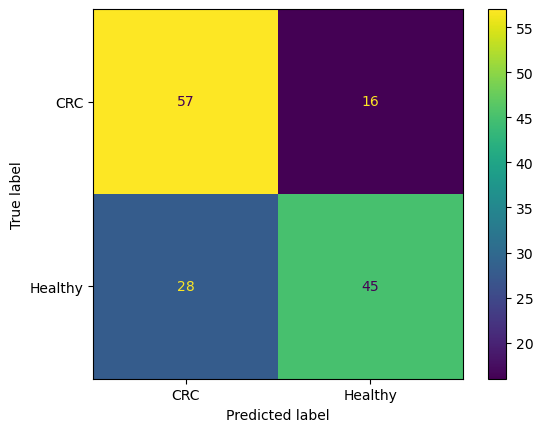

              precision    recall  f1-score   support

         CRC       0.67      0.78      0.72        73
     Healthy       0.74      0.62      0.67        73

    accuracy                           0.70       146
   macro avg       0.70      0.70      0.70       146
weighted avg       0.70      0.70      0.70       146



In [44]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

# Define parameters for RF model
params = {
    'n_estimators': [200, 500],
    'max_features': [0.1, 0.2, 0.3],
}

# Initialize RF classifier
rf_model = RandomForestClassifier(bootstrap=True, random_state=42)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate on test set
test_score = grid_search.best_estimator_.score(X_test, y_test)
print("Test Set Accuracy:", test_score)

y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['CRC', 'Healthy'])
plt.figure(figsize=(8, 6))
cm_display.plot()
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['CRC', 'Healthy'])
print(report)

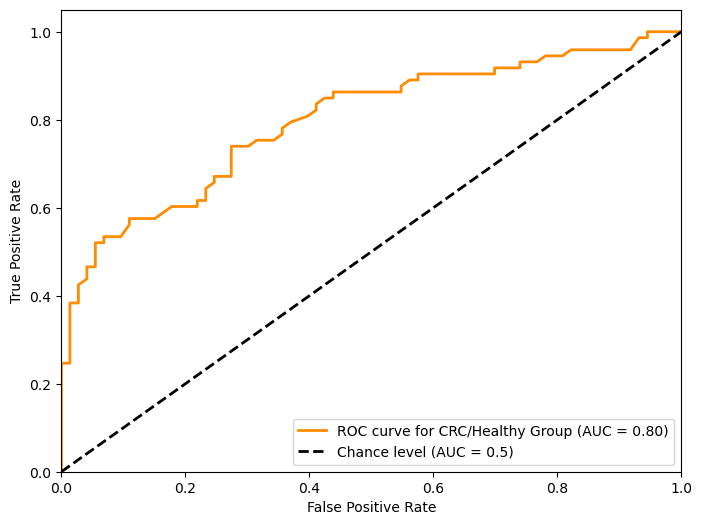

In [45]:
# Predict probabilities
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the AUROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve for CRC/Healthy Group (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, label=f'Chance level (AUC = 0.5)', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_27896\492831797.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[top_20_indices], y=feature_names[top_20_indices], palette="viridis")


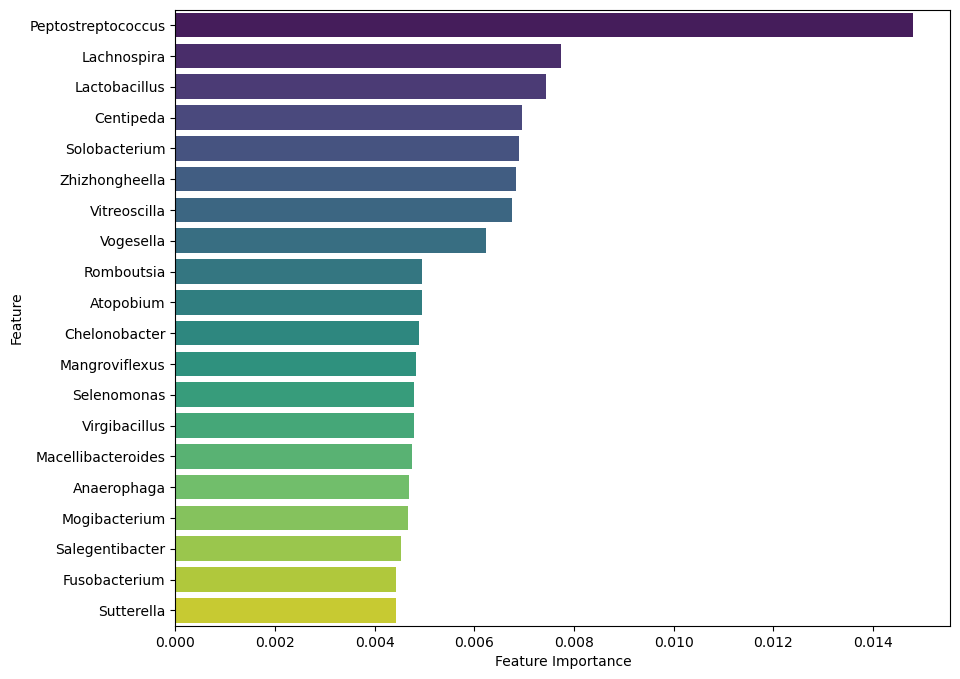

In [46]:
# Extract the best model
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

feature_importances = best_rf_model.feature_importances_
top_20_indices = feature_importances.argsort()[::-1][:20]
feature_names = X.columns

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances[top_20_indices], y=feature_names[top_20_indices], palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

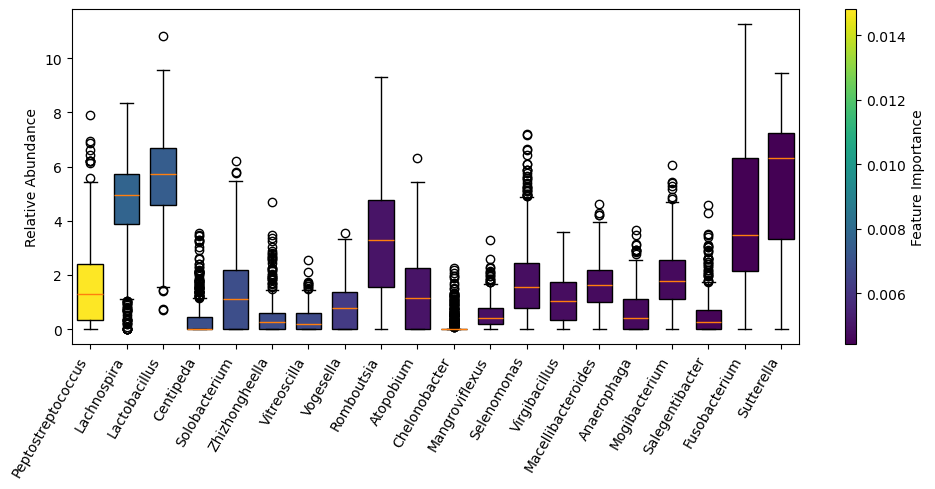

In [47]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

top_20_feature_names = feature_names[top_20_indices]

# Normalize feature importances
norm = Normalize(vmin=min(feature_importances[top_20_indices]), vmax=max(feature_importances[top_20_indices]))
cmap = plt.get_cmap('viridis')  # Choose a colormap
colors = [cmap(norm(importance)) for importance in feature_importances[top_20_indices]]

# Prepare data for boxplot
data = {}
scaled_X = np.log(X+1)

for column_name in top_20_feature_names:
    data[column_name] = scaled_X[column_name]

# Plot boxplot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot each box with the corresponding color based on feature importance
for i, (key, value) in enumerate(data.items()):
    box = ax.boxplot(value, positions=[i + 1], widths=0.7, patch_artist=True,
                     boxprops=dict(facecolor=colors[i], color='black'),
                     whiskerprops=dict(color='black'))

# Customize plot
ax.set_ylabel('Relative Abundance', fontsize=10)
ax.set_xticks(range(1, len(data) + 1))
ax.set_xticklabels(data.keys(), rotation=60, ha='right', fontsize=10)
plt.tight_layout()

# Add colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for colorbar, not for plotting
cbar = plt.colorbar(sm, ax=ax, aspect=30)
cbar.set_label('Feature Importance', fontsize=10)

plt.show()

In [48]:
#Evaluate the robustness of ML framework

# Define parameters for RF model
params = {
    'n_estimators': [200, 500],
    'max_features': [0.1, 0.2, 0.3],
}

# Initialize RF classifier
rf_model = RandomForestClassifier(bootstrap=True, random_state=42)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

n_iterations = 20
robustness_train_scores = []
robustness_test_scores = []
robustness_auroc = []

for i in range(n_iterations):
    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=i, stratify=y)

    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=cv)
    grid_search.fit(X_train, y_train)

    # Evaluate the model on the training data of the resampled set
    train_score = grid_search.best_score_
    robustness_train_scores.append(train_score)

    # Evaluate the model on the test data of the resampled set
    test_score = accuracy_score(y_test, grid_search.best_estimator_.predict(X_test))
    robustness_test_scores.append(test_score)
    
    # Calculate AUROC score
    y_test_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
    test_auroc = roc_auc_score(y_test, y_test_proba)
    robustness_auroc.append(test_auroc)

# Calculate statistics for training data
robustness_train_mean = np.mean(robustness_train_scores)
robustness_train_std = np.std(robustness_train_scores)

# Calculate statistics for test data
robustness_test_mean = np.mean(robustness_test_scores)
robustness_test_std = np.std(robustness_test_scores)

# Calculate statistics for AUROC
robustness_auroc_mean = np.mean(robustness_auroc)
robustness_auroc_std = np.std(robustness_auroc)

print("Train Mean Accuracy:", robustness_train_mean)
print("Train Std Accuracy:", robustness_train_std)
print("Test Mean Accuracy:", robustness_test_mean)
print("Test Std Accuracy:", robustness_test_std)
print("Mean AUROC:", robustness_auroc_mean)
print("Std AUROC:", robustness_auroc_std)


Train Mean Accuracy: 0.7226900972590629
Train Std Accuracy: 0.01460281782070159
Test Mean Accuracy: 0.7205479452054794
Test Std Accuracy: 0.027362992267723533
Mean AUROC: 0.7844717583036217
Std AUROC: 0.022644508140149726


In [49]:
print(f"Train_accuracy_scores: {robustness_train_scores}" )
print(f"Test_accuracy_scores: {robustness_test_scores}" )
print(f"Test_AUROC_scores: {robustness_auroc}" )

Train_accuracy_scores: [0.7276893604479812, 0.7313144709696433, 0.7311965811965813, 0.6987474211612142, 0.7448128499852638, 0.690111995284409, 0.6969938107869142, 0.7276156793398172, 0.7105953433539639, 0.7362953138815208, 0.7311376363100501, 0.724314765694076, 0.7124815797229591, 0.720807544945476, 0.7311965811965813, 0.7430887120542293, 0.7295019157088122, 0.7157235484821692, 0.7156940760389036, 0.7344827586206897]
Test_accuracy_scores: [0.7534246575342466, 0.7328767123287672, 0.726027397260274, 0.7534246575342466, 0.6986301369863014, 0.6986301369863014, 0.7191780821917808, 0.7465753424657534, 0.7191780821917808, 0.7328767123287672, 0.7123287671232876, 0.7465753424657534, 0.7808219178082192, 0.7397260273972602, 0.684931506849315, 0.6643835616438356, 0.6986301369863014, 0.6986301369863014, 0.6986301369863014, 0.7054794520547946]
Test_AUROC_scores: [0.7876712328767123, 0.7834490523550385, 0.7686245074122725, 0.8087821354850816, 0.7604616250703696, 0.785044098329893, 0.7954588102833551,